# Portfolio estimation

Small functions to visualize stock market data and calculate basic portfolio numbers

# LOAD OIL!


In [1]:
from pandas_datareader.data import DataReader
from pandas_datareader.moex import MoexReader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from finance import plot_adjusted_price, plot_instruments_correlation, plot_mean_avg, correlation_matrix, getData
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
path = "SPFB.BR_000101_190301.csv"
oil = pd.read_csv(path, sep=";", index_col="DATE")
oil.index = pd.to_datetime(oil.index, format="%Y%m%d")
oil = oil[["CLOSE"]]
oil.columns = ["BRENT"]
oil.head()

,BRENT
DATE,
2009-07-16,64.30
2009-07-17,66.20
2009-07-20,67.39
2009-07-21,67.12
2009-07-22,67.90


In [3]:
symbols= ["RTSI", "USD000UTSTOM"]
start_date = "2009-07-16"
end_date = "2019-03-01"
tickers_data =  getData(symbols, start_date=start_date, end_date=end_date)

RTSI
USD000UTSTOM


In [4]:
all_data = oil.join(tickers_data)
all_data["1/(BRENT)"] = 1/all_data["BRENT"]
all_data["1/(USD000UTSTOM)"] = 1/all_data["USD000UTSTOM"]

In [5]:
tickers_data.head()

,RTSI,USD000UTSTOM
2009-07-16,925.00,31.785
2009-07-17,925.00,31.785
2009-07-18,925.00,31.785
2009-07-19,925.00,31.785
2009-07-20,972.31,31.020


In [6]:
all_data.head()

,BRENT,RTSI,USD000UTSTOM,1/(BRENT),1/(USD000UTSTOM)
DATE,,,,,
2009-07-16,64.30,925.00,31.785,0.015552,0.031461
2009-07-17,66.20,925.00,31.785,0.015106,0.031461
2009-07-20,67.39,972.31,31.020,0.014839,0.032237
2009-07-21,67.12,987.69,30.975,0.014899,0.032284
2009-07-22,67.90,963.06,31.200,0.014728,0.032051


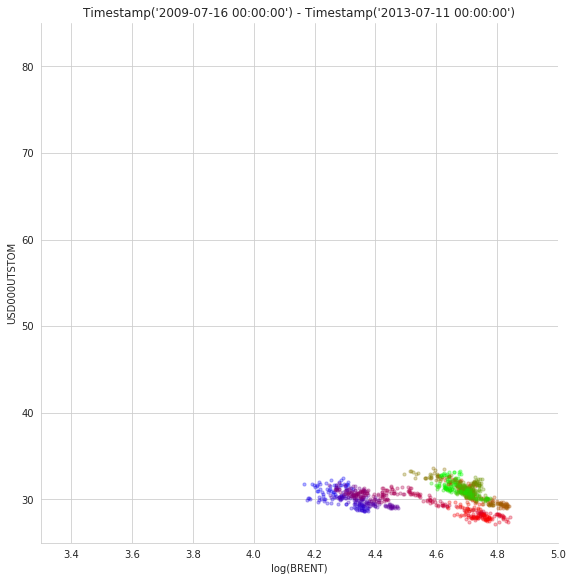

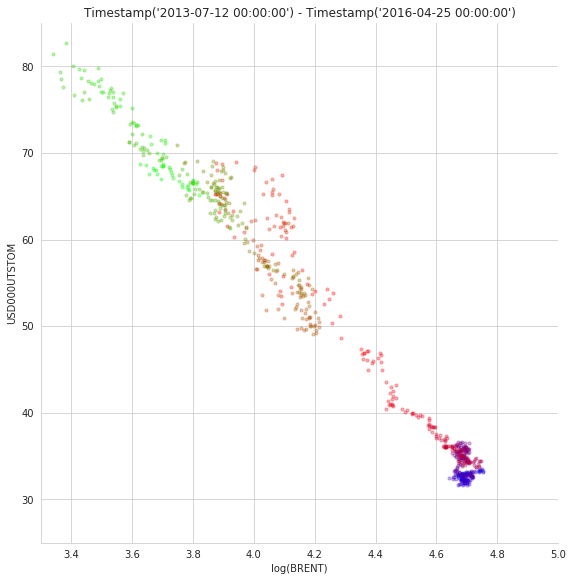

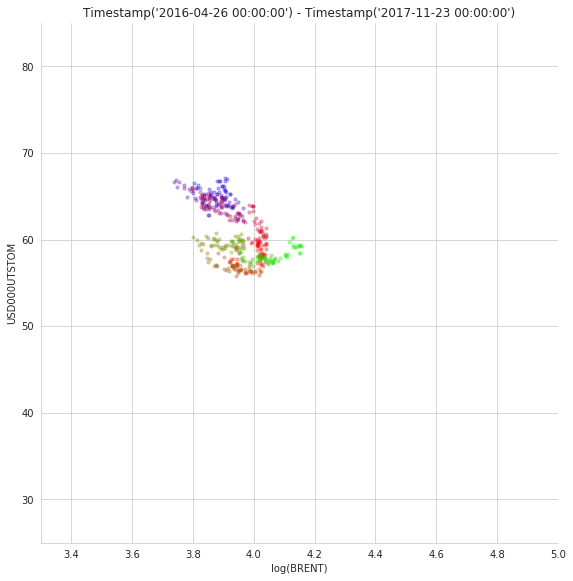

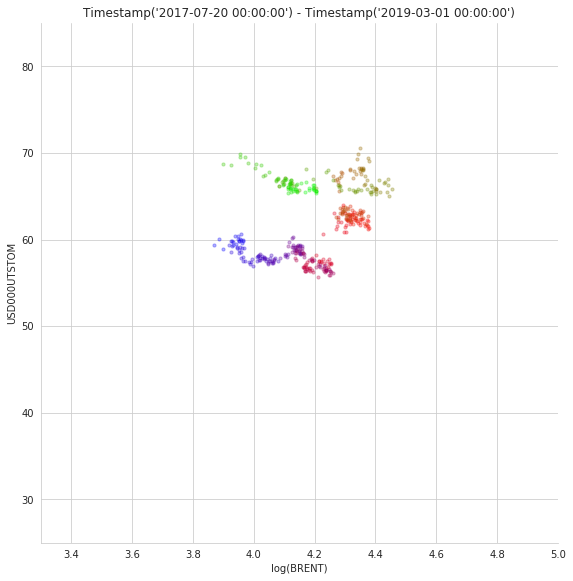

In [7]:
all_data["data"] = all_data.index
all_data["log(BRENT)"] = np.log(all_data["BRENT"])
for i in [(0, 1000), (1000, 1700), (1700, 2100), (2010, 2421)]:
    g = sns.FacetGrid(all_data.iloc[i[0]:i[1]], hue = 'data', palette = 'brg', height=8, aspect=1)
    g = g.map(plt.scatter, 'log(BRENT)', 'USD000UTSTOM', s = 10, alpha = 0.3)
    plt.xlim([3.3, 5])
    plt.ylim([25, 85])
    plt.title("{} - {}".format(repr(all_data.iloc[i[0]]["data"]), repr(all_data.iloc[i[1]-1]["data"])))

In [8]:
all_data["diff(USD000UTSTOM)"] = np.concatenate(([0,], np.diff(all_data["USD000UTSTOM"])))
all_data["diff(BRENT)"] = np.concatenate(([0,], np.diff(all_data["BRENT"])))

In [9]:
all_data.head()

,BRENT,RTSI,USD000UTSTOM,1/(BRENT),1/(USD000UTSTOM),data,log(BRENT),diff(USD000UTSTOM),diff(BRENT)
DATE,,,,,,,,,
2009-07-16,64.30,925.00,31.785,0.015552,0.031461,2009-07-16,4.163560,0.000,0.00
2009-07-17,66.20,925.00,31.785,0.015106,0.031461,2009-07-17,4.192680,0.000,1.90
2009-07-20,67.39,972.31,31.020,0.014839,0.032237,2009-07-20,4.210497,-0.765,1.19
2009-07-21,67.12,987.69,30.975,0.014899,0.032284,2009-07-21,4.206482,-0.045,-0.27
2009-07-22,67.90,963.06,31.200,0.014728,0.032051,2009-07-22,4.218036,0.225,0.78


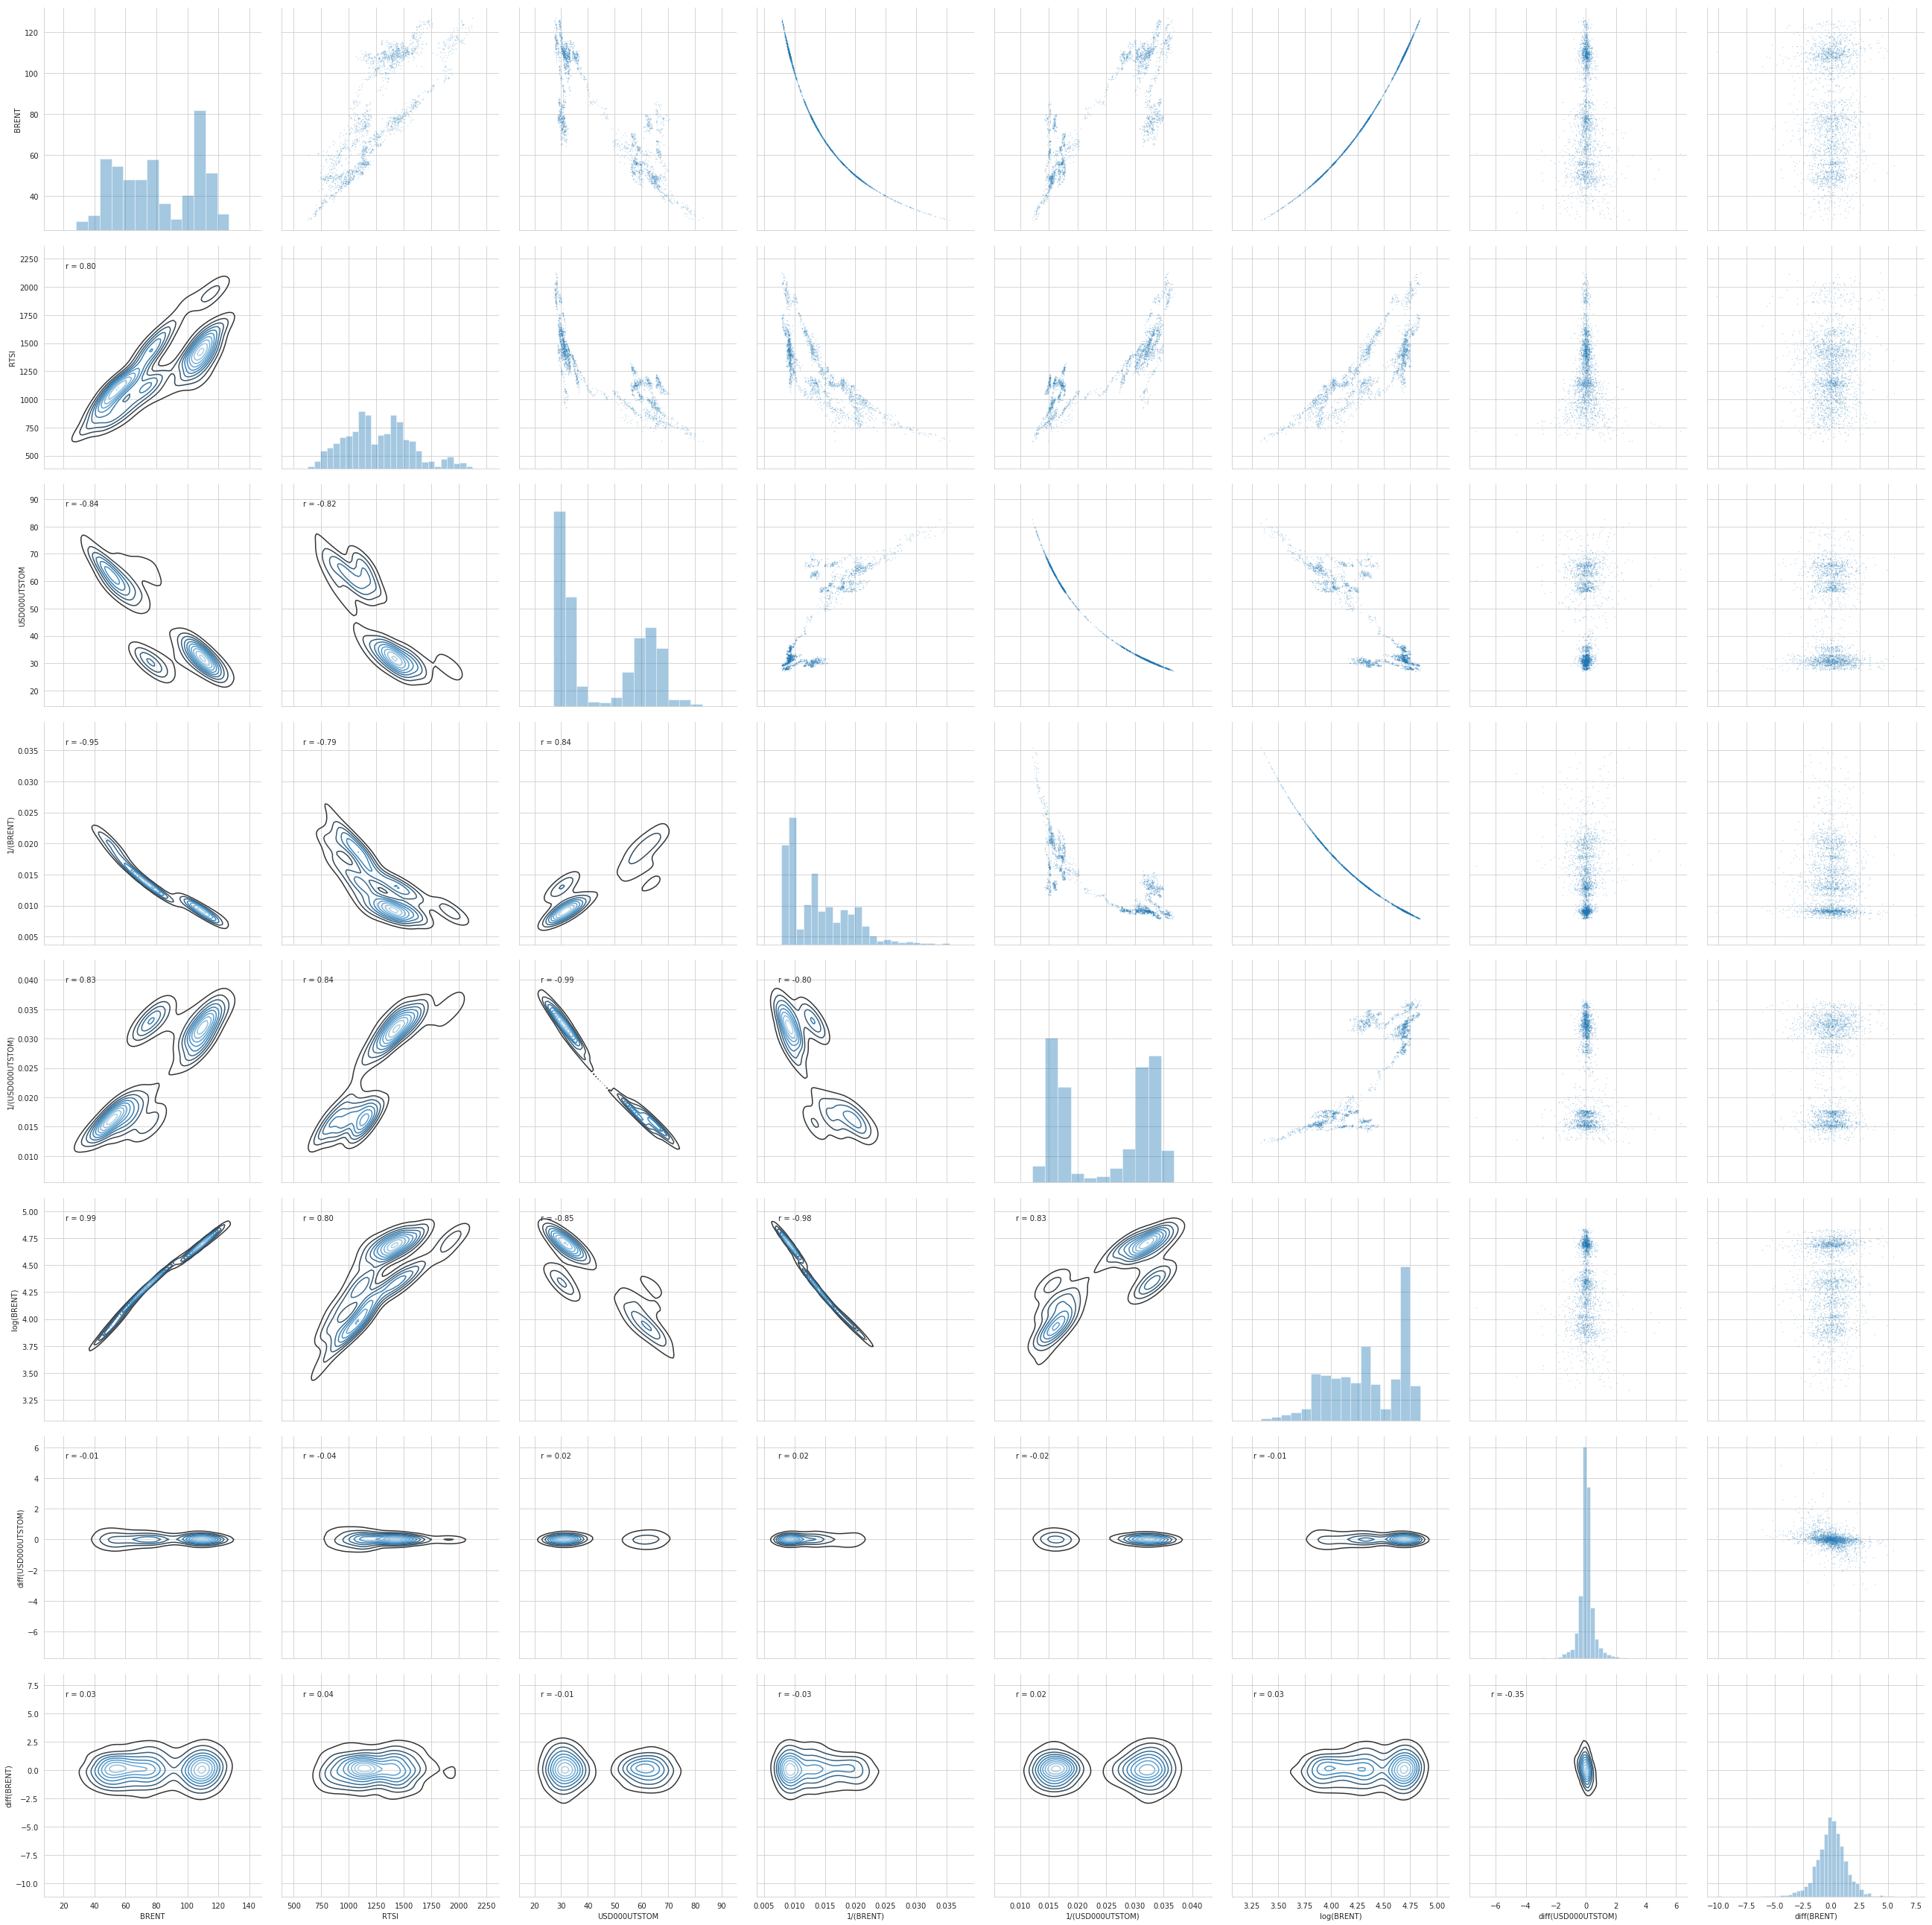

In [10]:
plot_instruments_correlation(all_data)

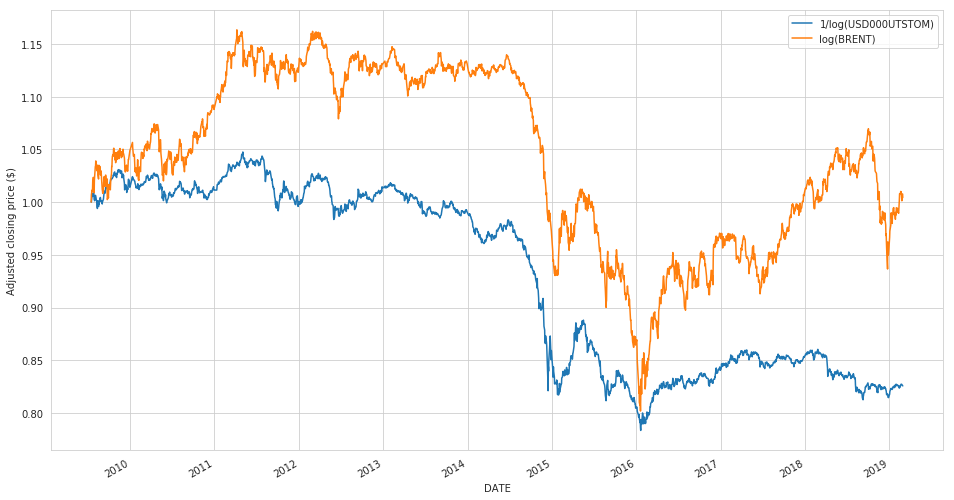

In [11]:
all_data["1/log(USD000UTSTOM)"] = 1/np.log(all_data["USD000UTSTOM"])
plot_adjusted_price(all_data[["1/log(USD000UTSTOM)", "log(BRENT)"]])

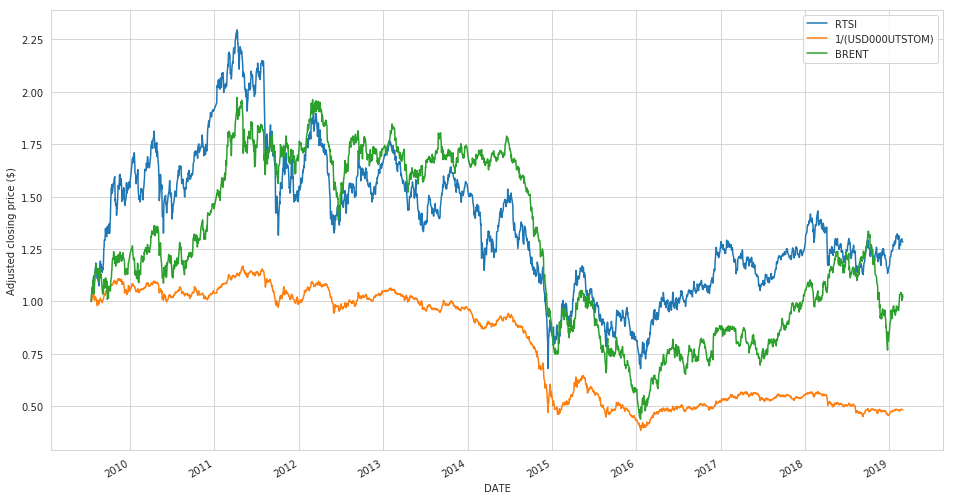

In [12]:
all_data["log(RTSI)"] = np.log(all_data["RTSI"])
all_data["log(BRENT)"] = np.log(all_data["BRENT"])
plot_adjusted_price(all_data[["RTSI", "1/(USD000UTSTOM)", "BRENT"]])

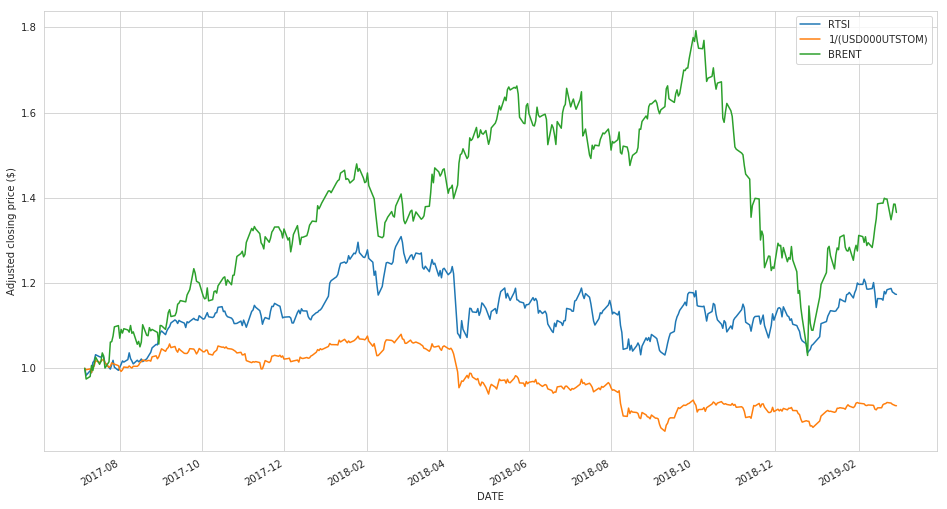

In [13]:
plot_adjusted_price(all_data.iloc[2000:][["RTSI", "1/(USD000UTSTOM)", "BRENT"]])